# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [120]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
booking=pd.read_excel('/content/drive/MyDrive/PG: Data Science & BA/Projects/Project 4: Classification: INN Hotels/INNHotelsGroup.csv.xlsx')
df=booking.copy()
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5,0,Canceled


In [9]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.8,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.5,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [10]:
df = df.drop('Booking_ID', axis=1)

## Data Overview

- Observations
- Sanity checks

In [11]:
df.shape

(36275, 18)

In [12]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          36275 non-null  int64 
 1   no_of_children                        36275 non-null  int64 
 2   no_of_weekend_nights                  36275 non-null  int64 
 3   no_of_week_nights                     36275 non-null  int64 
 4   type_of_meal_plan                     36275 non-null  object
 5   required_car_parking_space            36275 non-null  int64 
 6   room_type_reserved                    36275 non-null  object
 7   lead_time                             36275 non-null  int64 
 8   arrival_year                          36275 non-null  int64 
 9   arrival_month                         36275 non-null  int64 
 10  arrival_date                          36275 non-null  int64 
 11  market_segment_type         

In [14]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,5.000000


In [15]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5,0,Canceled


In [16]:
# Convert 'avg_price_per_room' to numeric, handling errors
df['avg_price_per_room'] = pd.to_numeric(df['avg_price_per_room'], errors='coerce')

# Convert to float if still needed
df['avg_price_per_room'] = df['avg_price_per_room'].astype(float)

In [17]:
for feature in df.columns:
  if df[feature].dtype=='object' :
    df[feature]=pd.Categorical(df[feature])

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [19]:
int_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'booking_status']

df[int_cols] = df[int_cols].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  category
 1   no_of_children                        36275 non-null  category
 2   no_of_weekend_nights                  36275 non-null  category
 3   no_of_week_nights                     36275 non-null  category
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  category
 11  ma

In [22]:
#print(pd.Booking_ID.value_counts())
print(df.no_of_adults.value_counts())
print(df.no_of_children.value_counts())
print(df.no_of_weekend_nights.value_counts())
print(df.no_of_week_nights.value_counts())
print(df.type_of_meal_plan.value_counts())
print(df.required_car_parking_space.value_counts())
print(df.room_type_reserved.value_counts())
print(df.lead_time.value_counts())
print(df.arrival_year.value_counts())
print(df.arrival_month.value_counts())
print(df.arrival_date.value_counts())
print(df.market_segment_type.value_counts())
print(df.repeated_guest.value_counts())
print(df.no_of_previous_cancellations.value_counts())
print(df.no_of_previous_bookings_not_canceled.value_counts())
print(df.avg_price_per_room.value_counts())
print(df.no_of_special_requests.value_counts())
print(df.booking_status.value_counts())


no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
8        62
10       62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [23]:
df.shape

(36275, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  category
 1   no_of_children                        36275 non-null  category
 2   no_of_weekend_nights                  36275 non-null  category
 3   no_of_week_nights                     36275 non-null  category
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  category
 11  ma

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Univariate and Bivariate Analysis

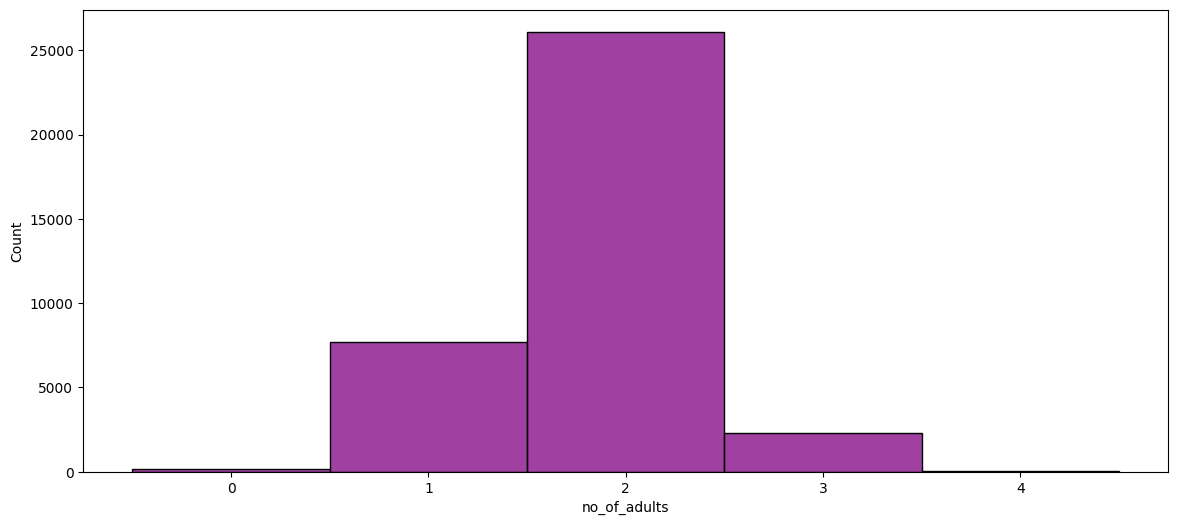

In [25]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['no_of_adults'], color="purple")
plt.show()

In [26]:
df.no_of_children.value_counts()

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


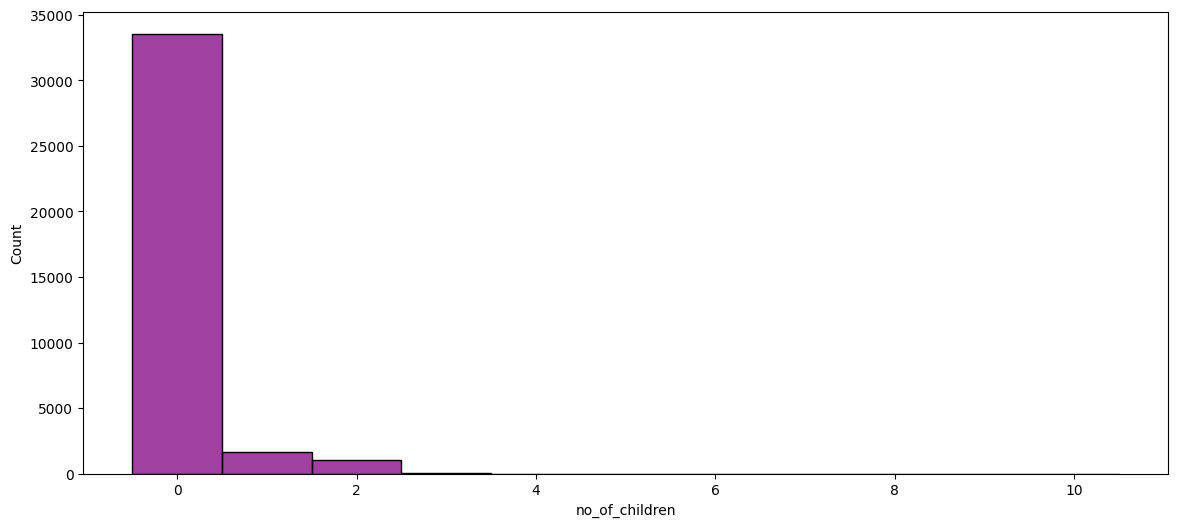

In [27]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['no_of_children'], color="purple")
plt.show()

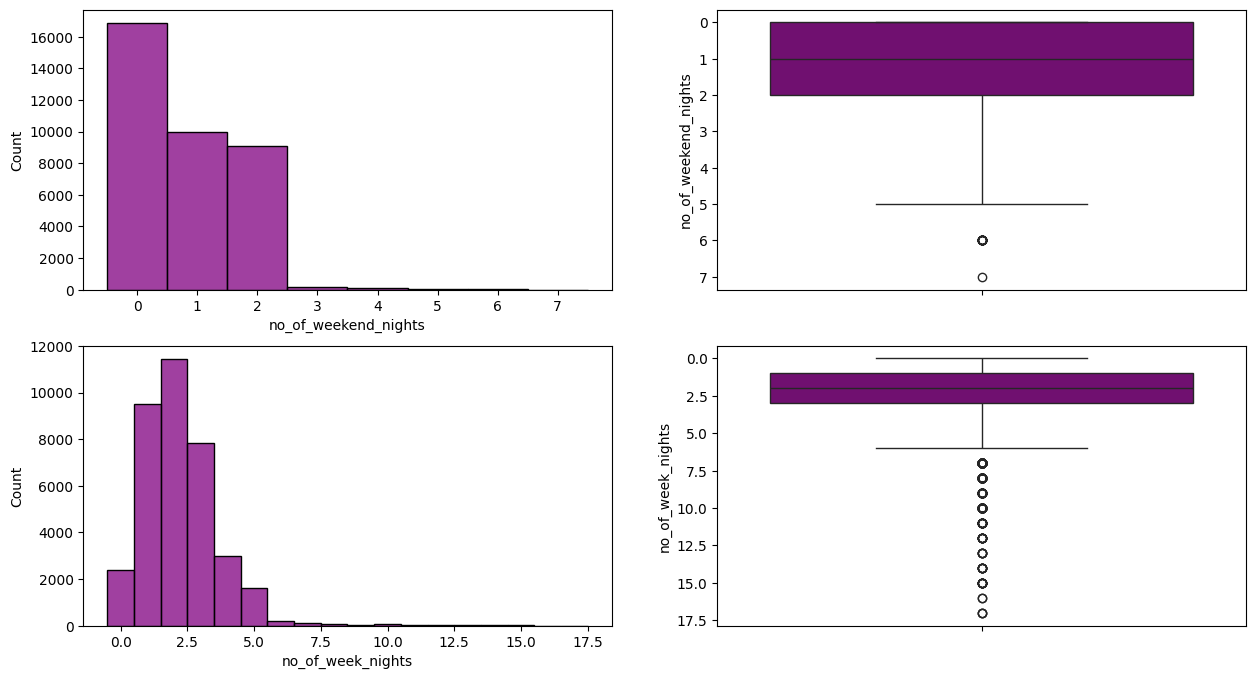

In [28]:
axs, figure = plt.subplots(2, 2, figsize=(15, 8))
sns.histplot(df['no_of_weekend_nights'], ax=figure[0][0], color="purple")
sns.boxplot(df['no_of_weekend_nights'], ax=figure[0][1], color="purple")
sns.histplot(df['no_of_week_nights'], ax=figure[1][0], color="purple")
sns.boxplot(df['no_of_week_nights'], ax=figure[1][1], color="purple")
plt.show()

In [29]:
df.type_of_meal_plan.value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


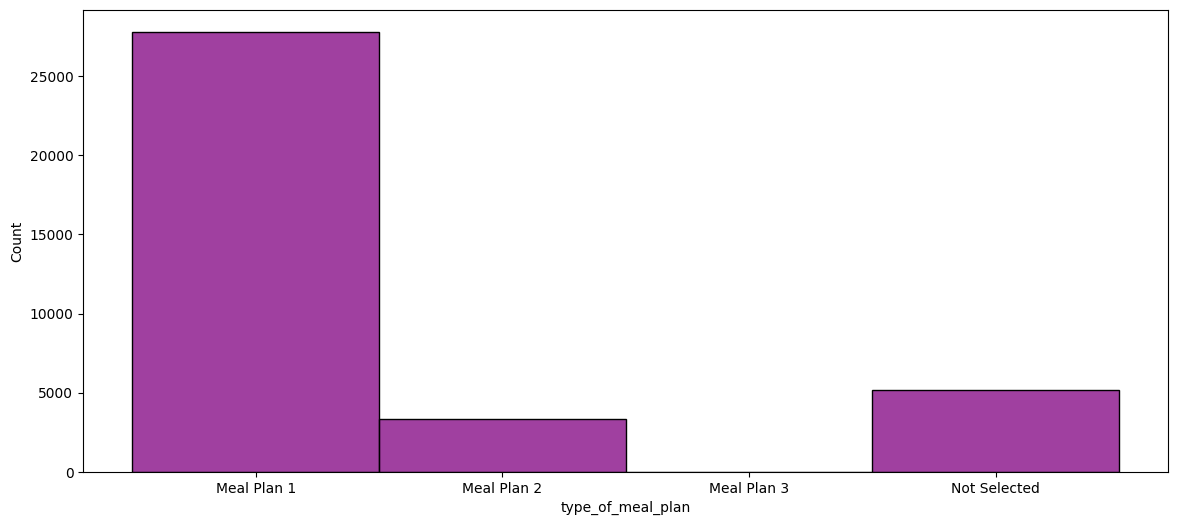

In [30]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['type_of_meal_plan'], color="purple")
plt.show()

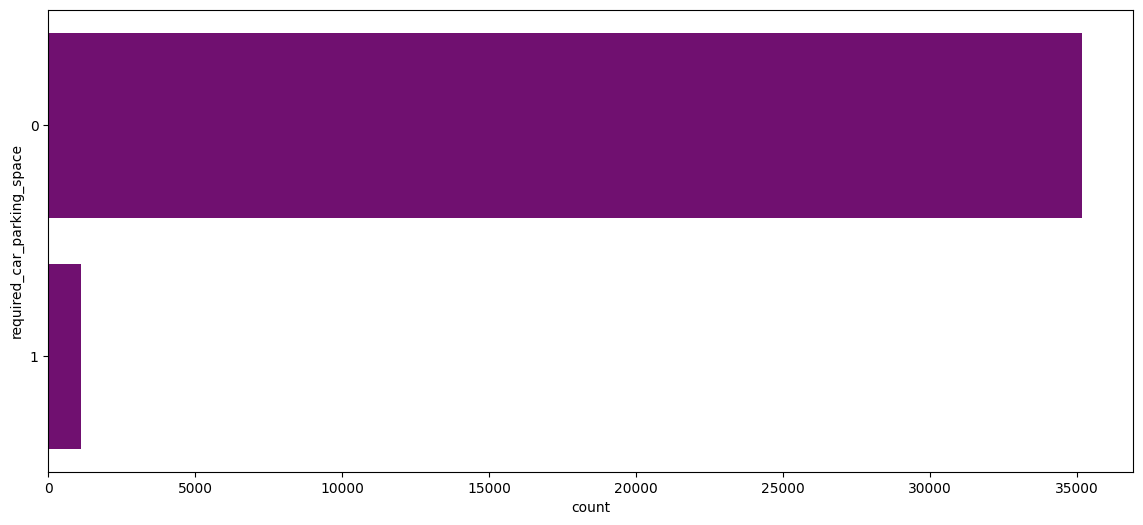

In [31]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['required_car_parking_space'], color="purple")
plt.show()

In [32]:
df.room_type_reserved.value_counts()

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


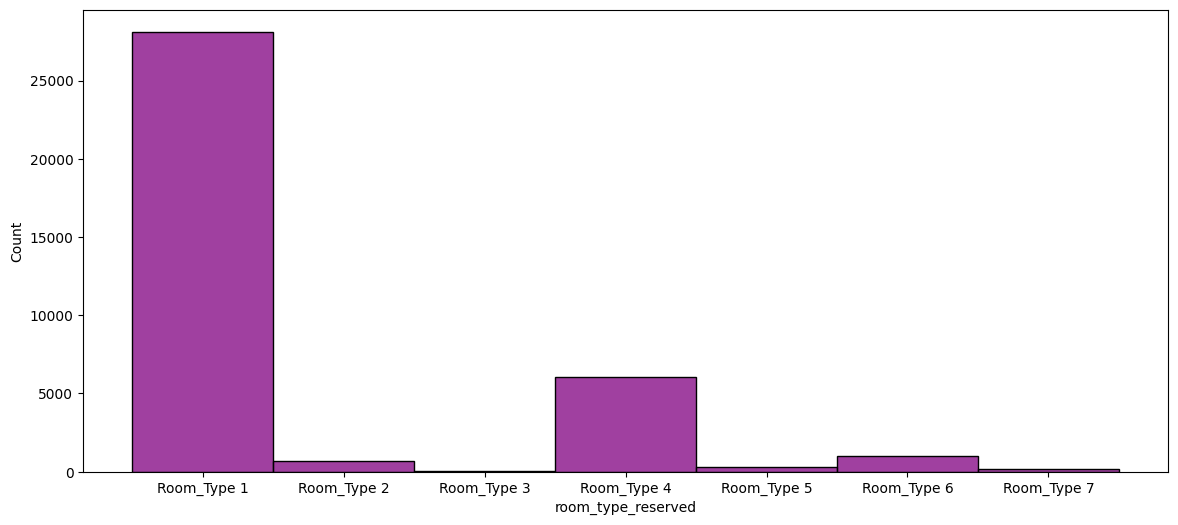

In [33]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['room_type_reserved'], color="purple")
plt.show()

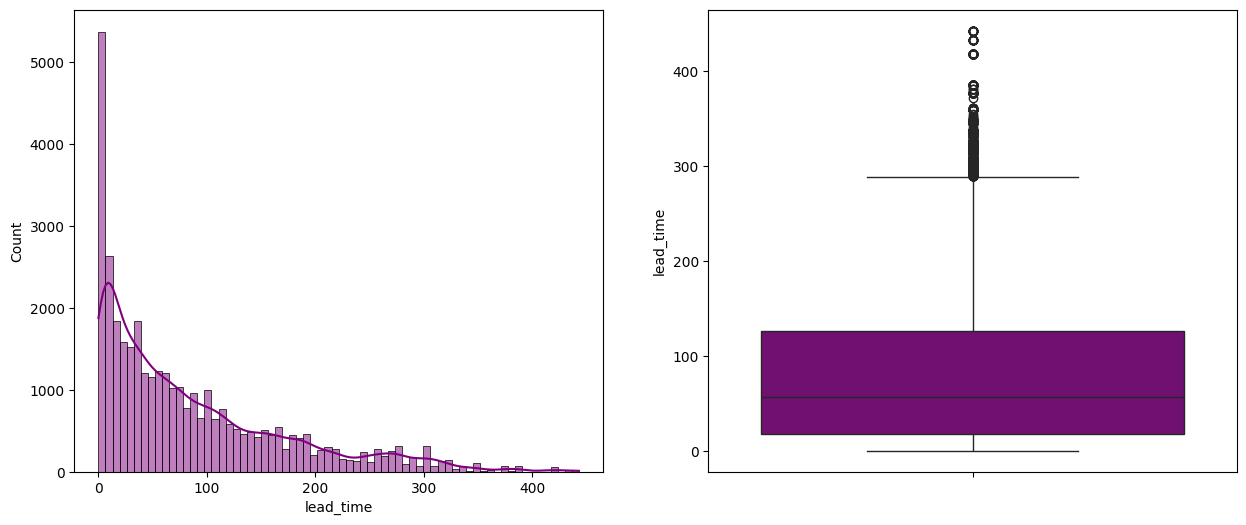

In [34]:
axs, figure = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['lead_time'], ax=figure[0], kde=True, color="purple")
sns.boxplot(df['lead_time'], ax=figure[1], color="purple")
plt.show()

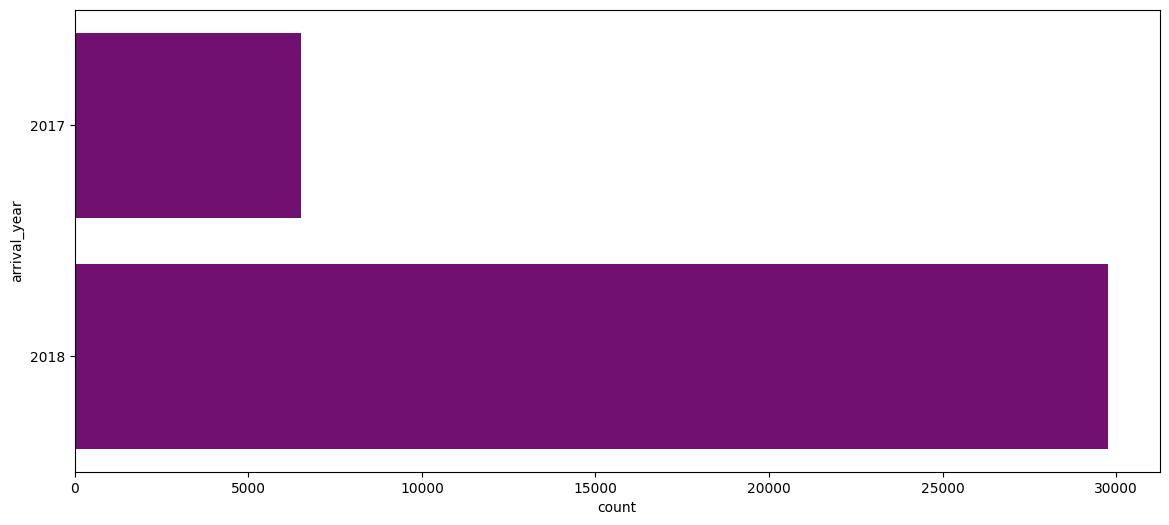

In [35]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['arrival_year'], color="purple")
plt.show()

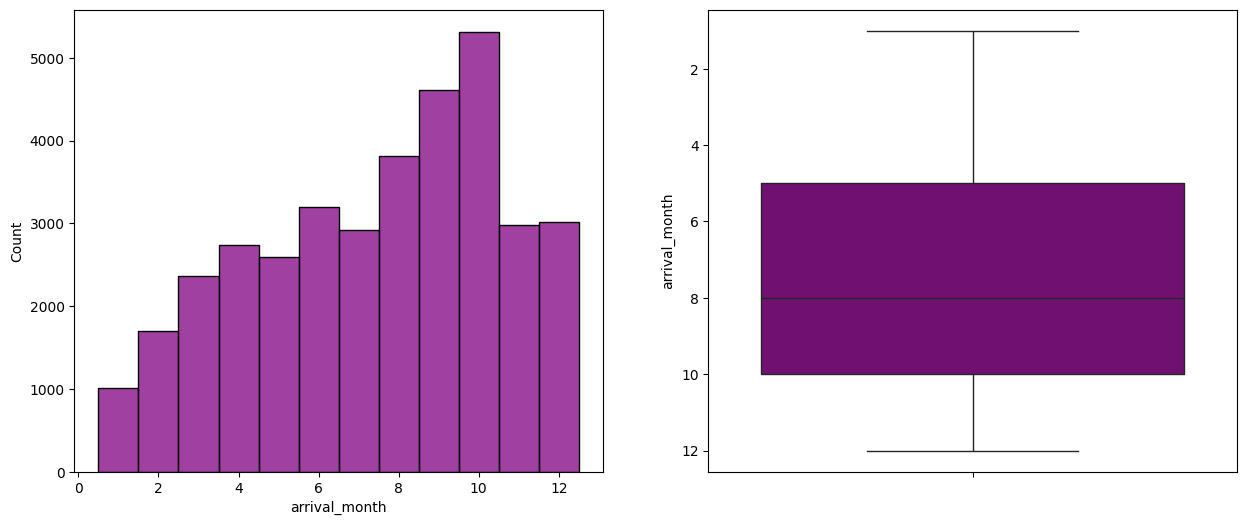

In [36]:
axs, figure = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['arrival_month'], ax=figure[0], color="purple")
sns.boxplot(df['arrival_month'], ax=figure[1], color="purple")
plt.show()

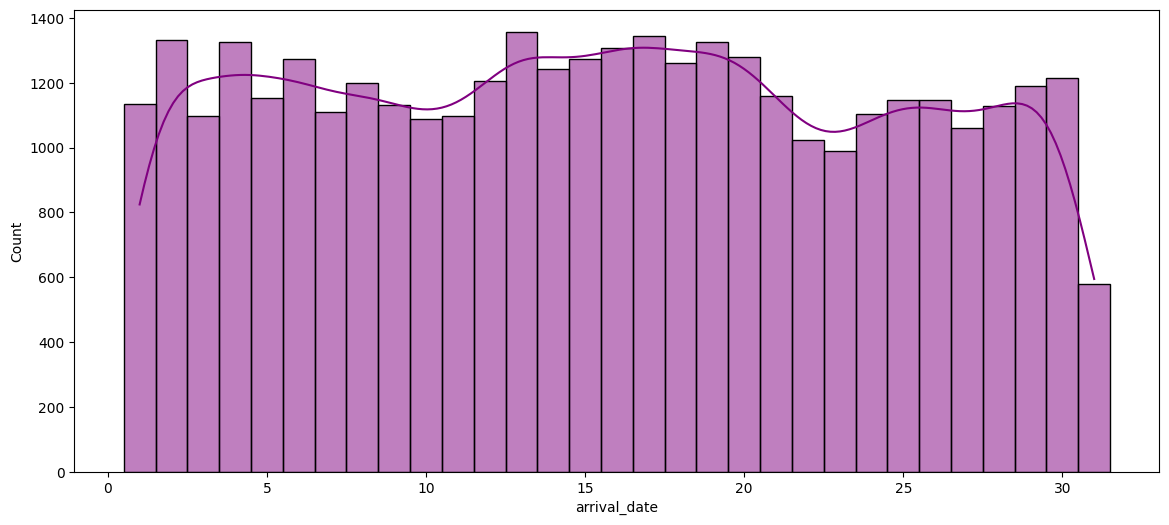

In [37]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['arrival_date'], kde=True, color="purple")
plt.show()

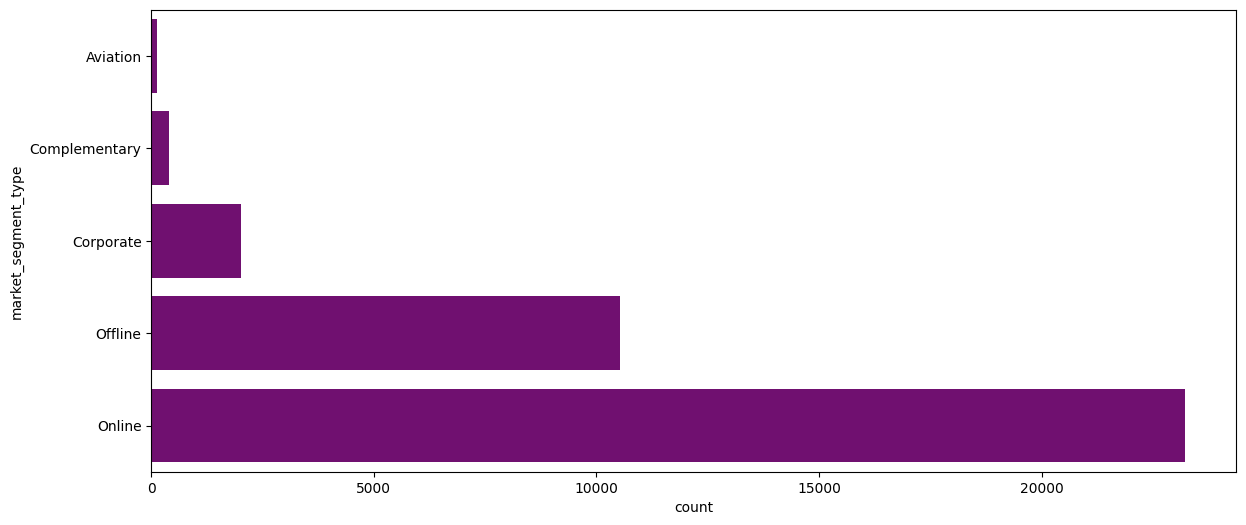

In [38]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['market_segment_type'],color="purple")
plt.show()

In [39]:
df.repeated_guest.value_counts()

,count
repeated_guest,
0,35345
1,930


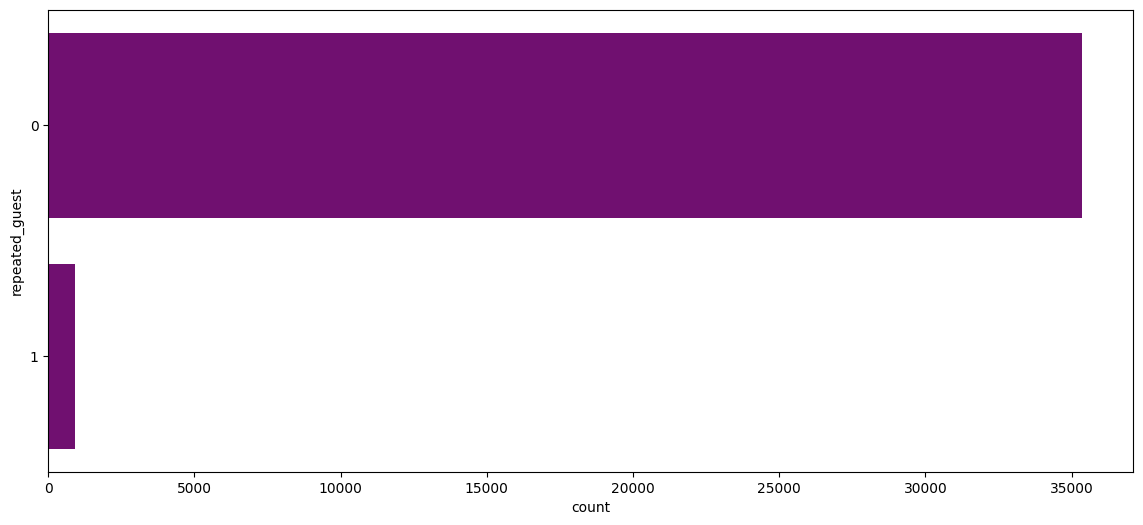

In [40]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['repeated_guest'],color="purple")
plt.show()

In [41]:
df.no_of_previous_cancellations.value_counts()

,count
no_of_previous_cancellations,
0,35937
1,198
2,46
3,43
11,25
5,11
4,10
13,4
6,1


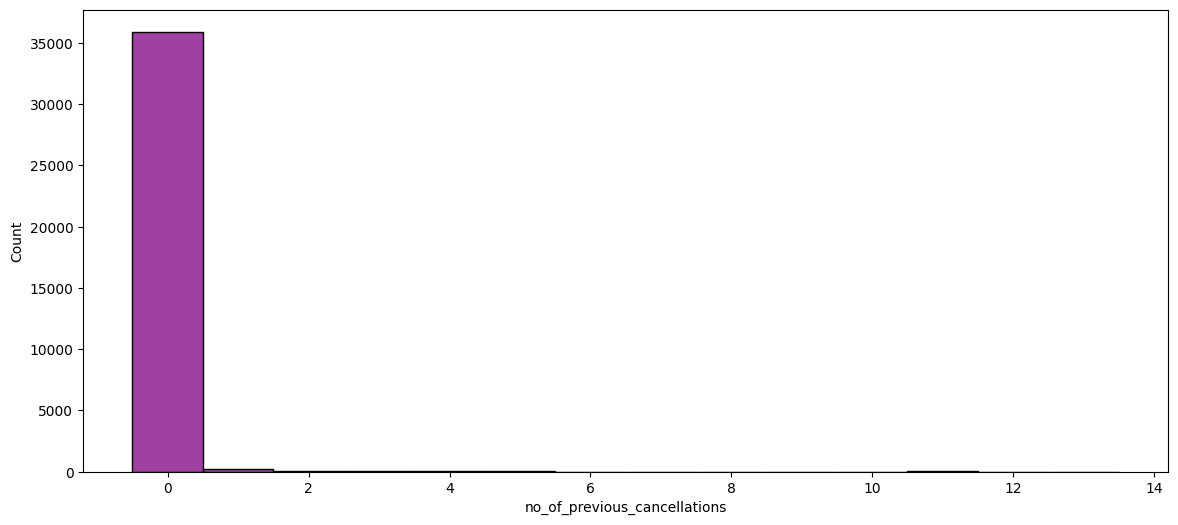

In [42]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['no_of_previous_cancellations'], color="purple")
plt.show()

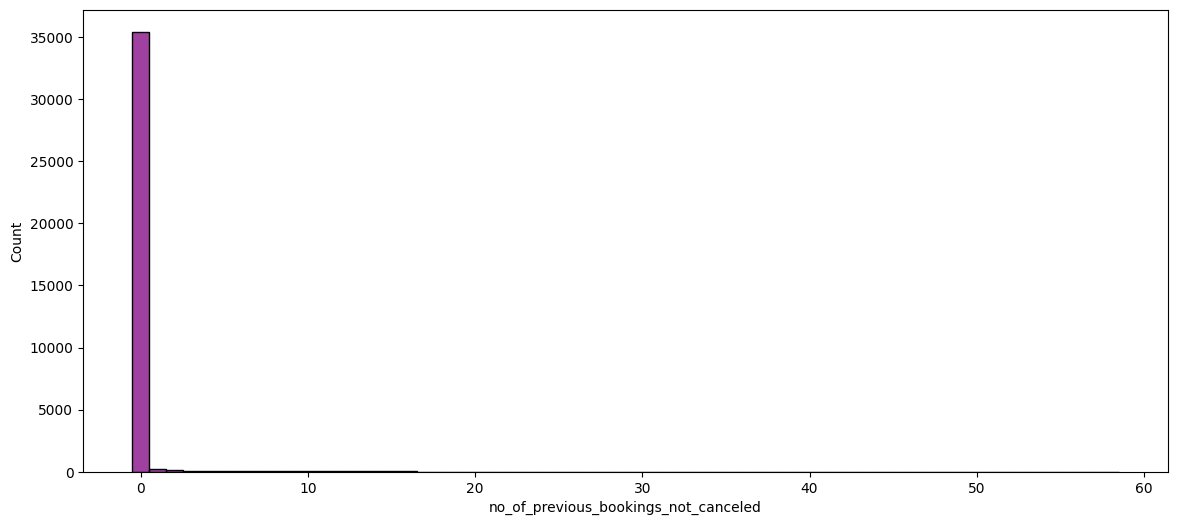

In [43]:
fig=plt.figure(figsize=(14,6))
sns.histplot(df['no_of_previous_bookings_not_canceled'], color="purple")
plt.show()

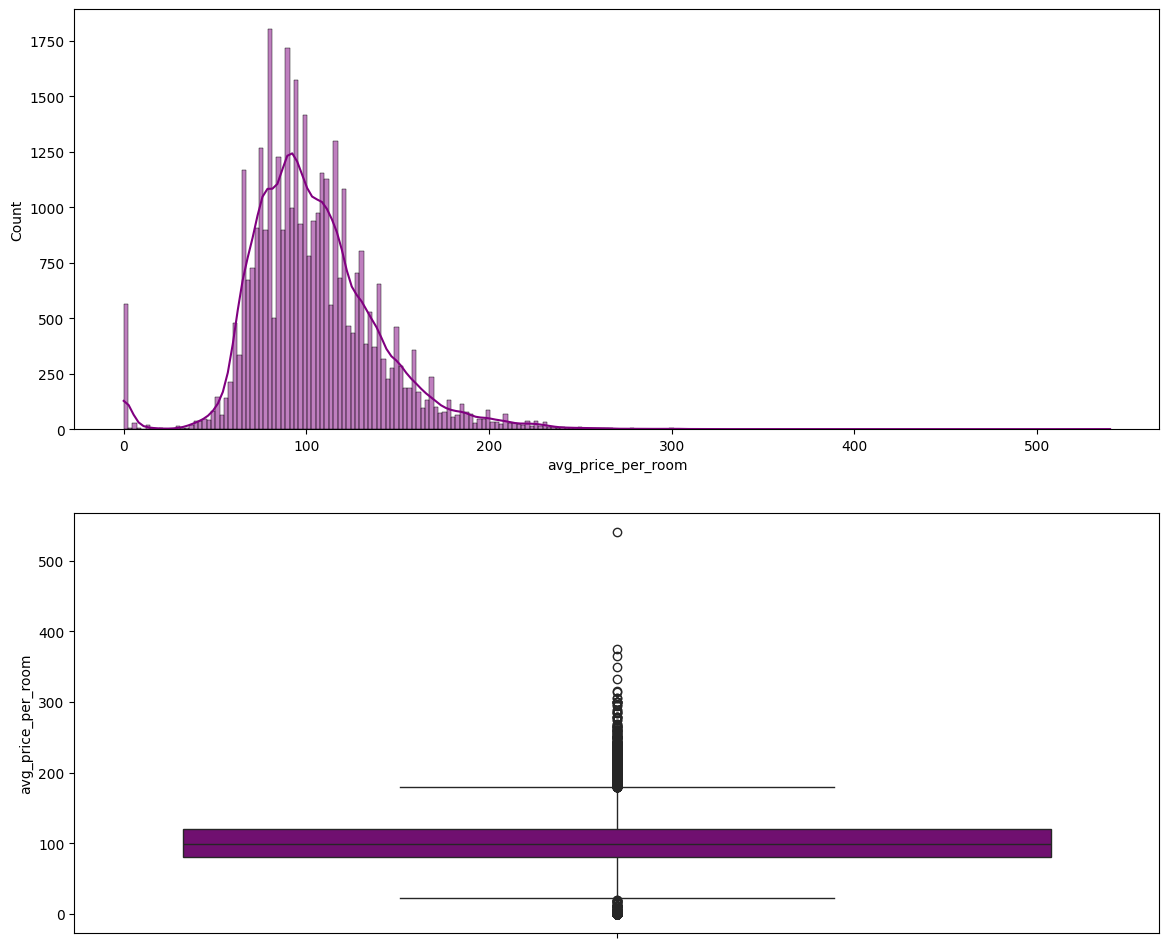

In [44]:
axs, figure = plt.subplots(2, 1, figsize=(14, 12))
sns.histplot(df['avg_price_per_room'], ax=figure[0], kde=True, color="purple")
sns.boxplot(df['avg_price_per_room'], ax=figure[1], color="purple")
plt.show()

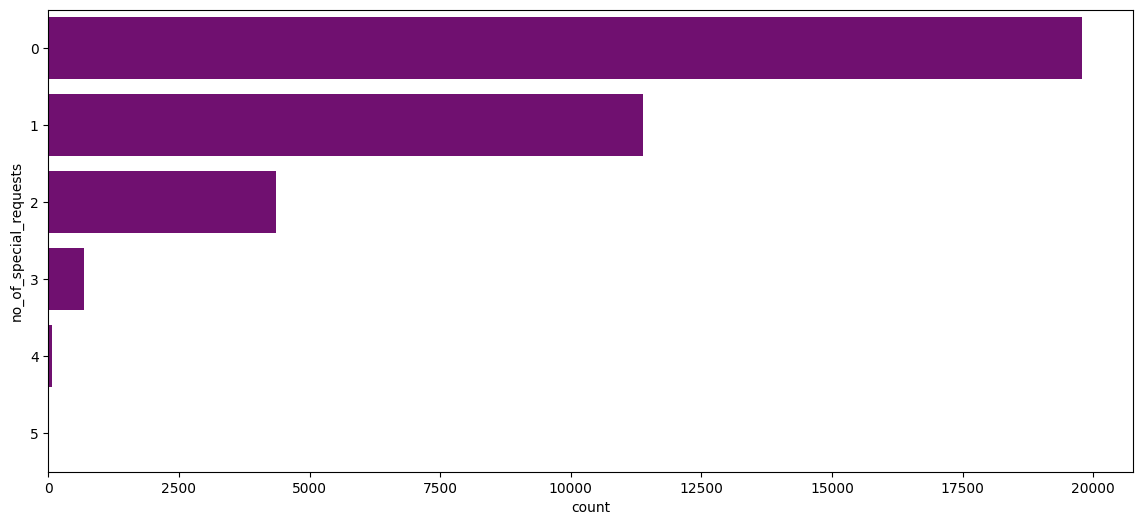

In [45]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['no_of_special_requests'],color="purple")
plt.show()

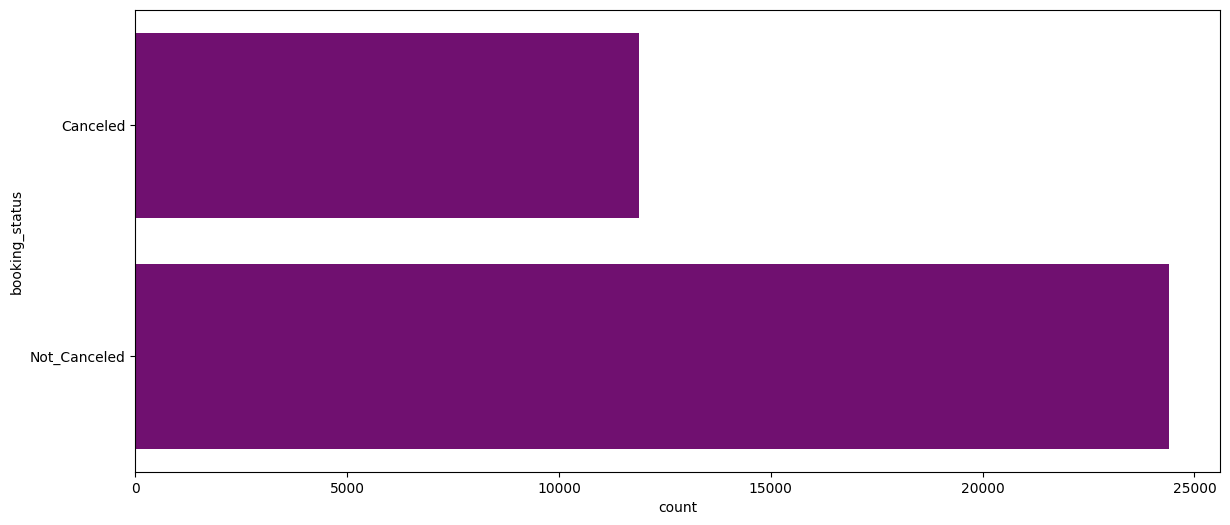

In [46]:
fig=plt.figure(figsize=(14,6))
sns.countplot(df['booking_status'],color="purple")
plt.show()

In [113]:
#De los bookings totales, miro lead_time para cancelados vs no cancelados
#media de lead_time para ambos

df.groupby('booking_status')['lead_time'].mean()

,lead_time
booking_status,
Canceled,139.215482
Not_Canceled,58.927224


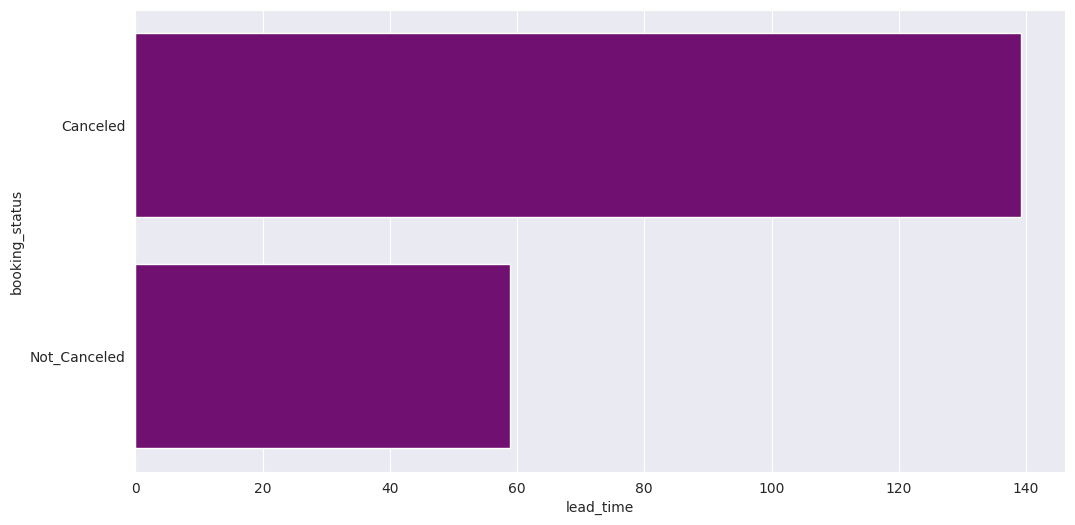

In [114]:
lead_booking = df.groupby('booking_status')['lead_time'].mean().reset_index()

lead_booking = lead_booking.sort_values(by=['lead_time'], ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='booking_status', x='lead_time', data=lead_booking, color='purple', order=lead_booking['booking_status'])

plt.xticks(rotation=0, ha='center')

plt.show()

It is observed that the number of canceled reservations is higher when the lead time is close to 140 days.

###**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Question 1: What are the busiest months in the hotel?

In [47]:
count_of_month=df.arrival_month.value_counts()
top5months=count_of_month.head(5)
print(top5months)

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
Name: count, dtype: int64


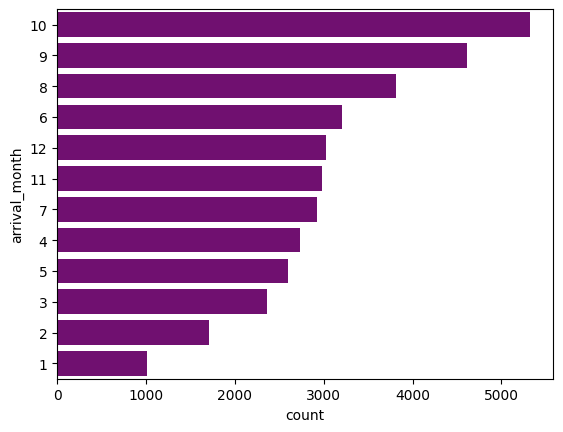

In [48]:
sns.countplot(df['arrival_month'], color="purple", order= df['arrival_month'].value_counts().index )
plt.show()

Question 2: Which market segment do most of the guests come from?

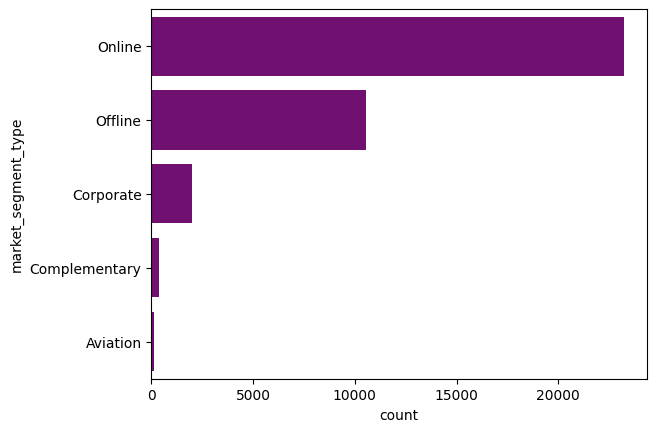

In [49]:
sns.countplot(df['market_segment_type'], color="purple", order= df['market_segment_type'].value_counts().index )
plt.show()

Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [50]:
market_avg1 = df.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)
market_avg1

,avg_price_per_room
market_segment_type,
Online,112.260890
Aviation,100.704000
Offline,91.632679
Corporate,82.911740
Complementary,3.133582


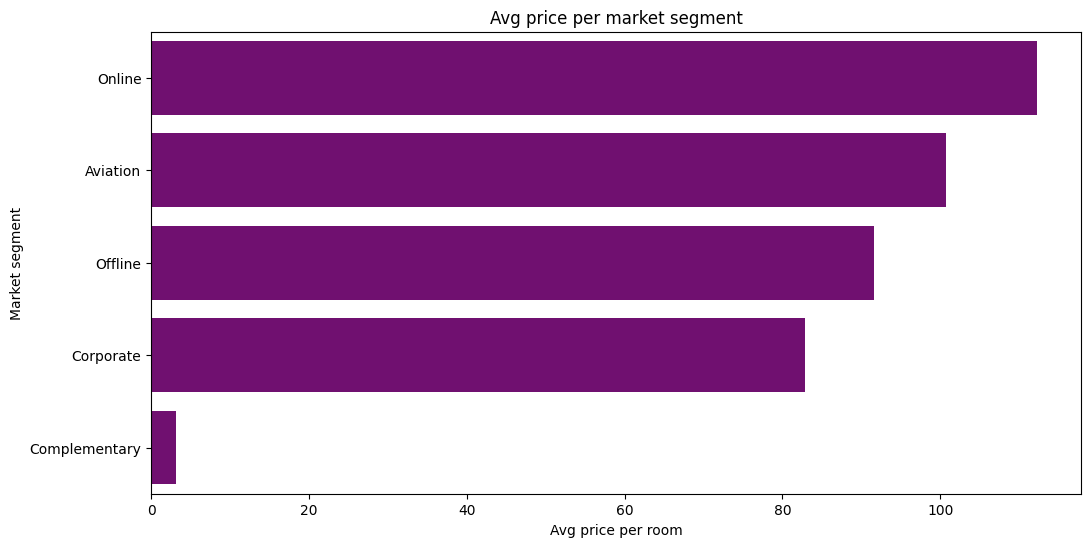

In [51]:
market_avg = df.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()

market_avg = market_avg.sort_values(by=['avg_price_per_room'], ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='market_segment_type', x='avg_price_per_room', data=market_avg, color='purple', order=market_avg['market_segment_type'])

plt.xlabel('Avg price per room')
plt.ylabel('Market segment')
plt.title('Avg price per market segment')

plt.xticks(rotation=0, ha='center')

plt.show()

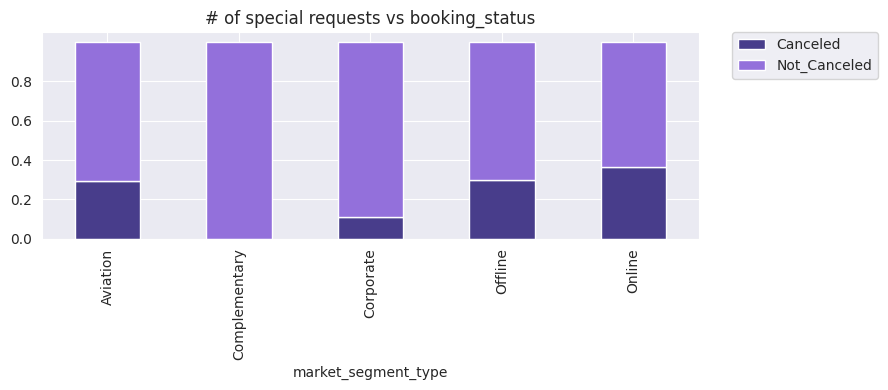

In [116]:
#Market_segment vs Booking_status

pd.crosstab(df['market_segment_type'],df['booking_status'],normalize='index').plot(kind="bar", figsize=(9,4), stacked=True, color=['#483D8B', '#9370DB'])
plt.title('# of special requests vs booking_status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.yticks(np.arange(0, 1, 0.2))
plt.tight_layout()
plt.show()


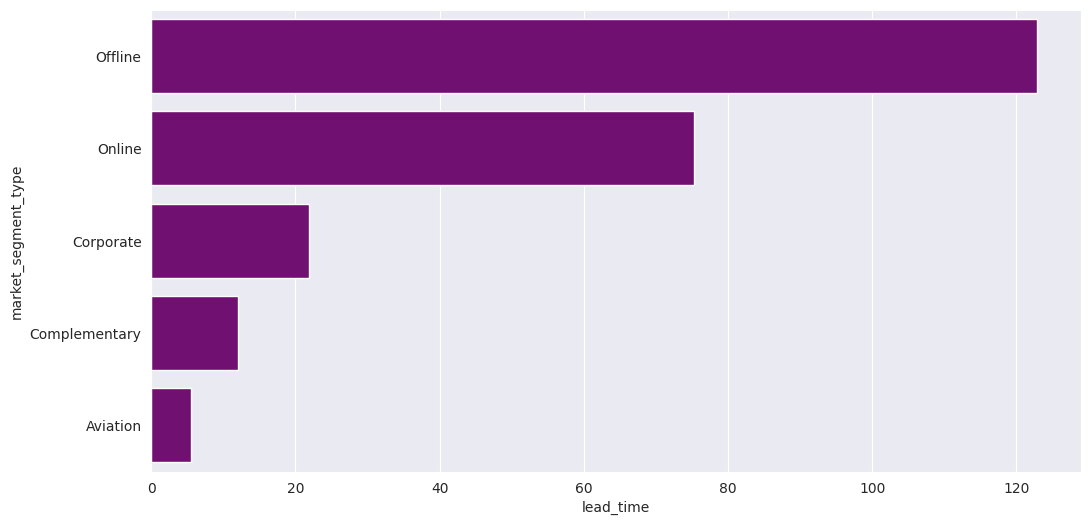

In [118]:
#lead_time.mean for #market_segment_tipe

lead_segment = df.groupby('market_segment_type')['lead_time'].mean().reset_index()

lead_segment = lead_segment.sort_values(by=['lead_time'], ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='market_segment_type', x='lead_time', data=lead_segment, color='purple', order=lead_segment['market_segment_type'])

plt.xticks(rotation=0, ha='center')

plt.show()

In [119]:
print(lead_segment)

  market_segment_type   lead_time
3             Offline  122.872625
4              Online   75.334238
2           Corporate   21.818047
1       Complementary   12.035806
0            Aviation    5.488000


Question 4: What percentage of bookings are canceled?

In [52]:
df.booking_status.value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [53]:
total_canceled=df[df['booking_status']=='Canceled'].shape[0]
print(round((total_canceled/df.shape[0])*100,2),'%')

32.76 %


Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [54]:
cancel_repeated=df[(df["repeated_guest"]==1)&(df["booking_status"]=="Canceled")].shape[0]
repeat=df[df["repeated_guest"]==1].shape[0]
print(round((cancel_repeated/repeat)*100,2),'%')

1.72 %


Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

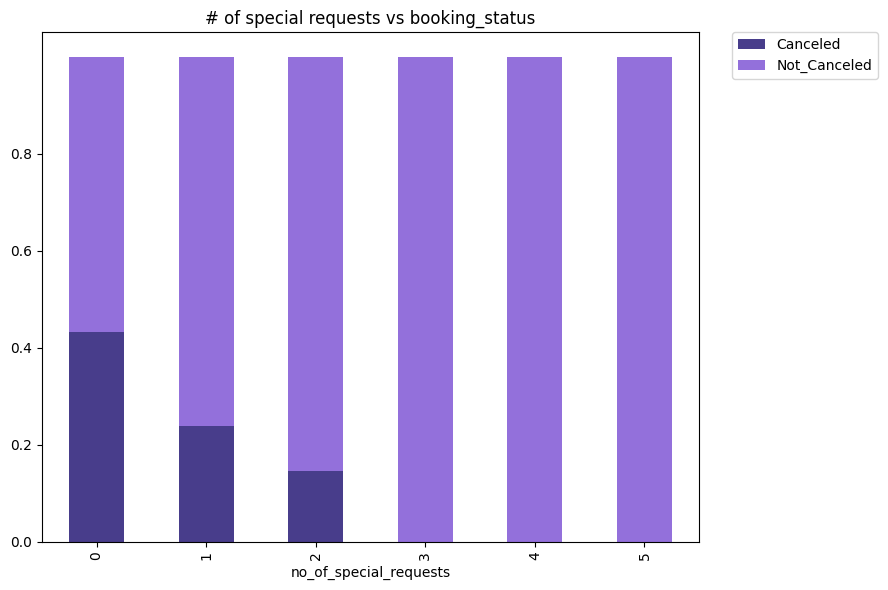

In [55]:

pd.crosstab(df['no_of_special_requests'],df['booking_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color=['#483D8B', '#9370DB'])
plt.title('# of special requests vs booking_status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.yticks(np.arange(0, 1, 0.2))
plt.tight_layout()
plt.show()


A trend can be observed where the higher the requirements, the fewer cancellations occur.

## Data Preprocessing

- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [56]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
df_copy=booking.copy()
df_copy = df_copy.drop('Booking_ID', axis=1)

In [58]:
replaceStruct={
    "type_of_meal_plan": { "Not Selected":0, "Meal Plan 1":1, "Meal Plan 2":2, "Meal Plan 3":3},
    "booking_status": { "Not_Canceled":0, "Canceled":1},
    "required_car_parking_space":{ "0":0, "1":1},
    "repeated_guest":{ "0":0, "1":1}
   }

oneHotCols=['market_segment_type', 'room_type_reserved']

df_copy=df_copy.replace(replaceStruct)
df_copy=pd.get_dummies(df_copy, columns=oneHotCols, drop_first=True)

#pd.set_option('future.no_silent_downcasting', True)


for column in oneHotCols:
    dummy_cols = [col for col in df_copy.columns if col.startswith(column)]
    #0 is false, 1 is True
    df_copy[dummy_cols] = df_copy[dummy_cols].astype(int)

df_copy.head(10)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,2,0,1,2,1,0,224,2017,10,2,...,0,0,1,0,0,0,0,0,0,0
1,2,0,2,3,0,0,5,2018,11,6,...,0,0,0,1,0,0,0,0,0,0
2,1,0,2,1,1,0,1,2018,2,28,...,0,0,0,1,0,0,0,0,0,0
3,2,0,0,2,1,0,211,2018,5,20,...,0,0,0,1,0,0,0,0,0,0
4,2,0,1,1,0,0,48,2018,4,11,...,0,0,0,1,0,0,0,0,0,0
5,2,0,0,2,2,0,346,2018,9,13,...,0,0,0,1,0,0,0,0,0,0
6,2,0,1,3,1,0,34,2017,10,15,...,0,0,0,1,0,0,0,0,0,0
7,2,0,1,3,1,0,83,2018,12,26,...,0,0,0,1,0,0,1,0,0,0
8,3,0,0,4,1,0,121,2018,7,6,...,0,0,1,0,0,0,0,0,0,0
9,2,0,0,5,1,0,44,2018,10,18,...,0,0,0,1,0,0,1,0,0,0


In [59]:
# Convert 'avg_price_per_room' to numeric, handling errors
df_copy['avg_price_per_room'] = pd.to_numeric(df_copy['avg_price_per_room'], errors='coerce')

# Convert to float if still needed
df_copy['avg_price_per_room'] = df_copy['avg_price_per_room'].astype(float)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [61]:
df_copy.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
lead_time,0
arrival_year,0
arrival_month,0
arrival_date,0


In [62]:
df_copy["avg_price_per_room"].fillna(df_copy["avg_price_per_room"].mean(), inplace=True)
df_copy.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
lead_time,0
arrival_year,0
arrival_month,0
arrival_date,0


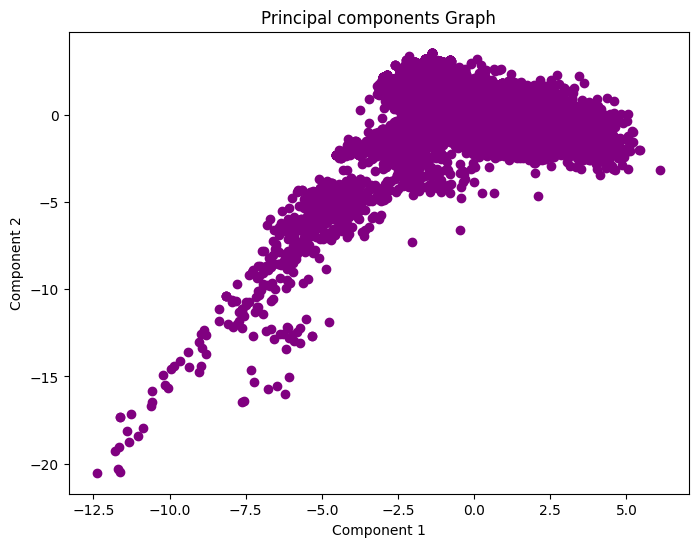

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

numeric_cols = df_copy.select_dtypes(include=['number']).columns
X = df_copy[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled_imputed)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], color='purple')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal components Graph')
plt.show()

In [64]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f
# 1) Convertir el DataFrame a numpy array
#X = DATA_COM[['PF (°C)',"C14:0","C16:0","C18:0", 'C18:2 ']].values  # dimensión n x p
X =  df_copy[df_copy.columns].values  # dimensión n x p
# 2) Dimensiones de los datos
n, p = X.shape  # n = número de observaciones, p = número de variables

# 3) Calcular el vector de medias y la matriz de covarianza
mean_vec = np.mean(X, axis=0)          # Vector de medias (dim p)
cov_mat = np.cov(X, rowvar=False)      # Matriz de covarianza (p x p)

# 4) Invertir la matriz de covarianza
cov_mat_inv = np.linalg.inv(cov_mat)
T2 = []
for i in range(n):
    diff = X[i, :] - mean_vec
    T2_i = diff.dot(cov_mat_inv).dot(diff.T)
    T2.append(T2_i)

T2 = np.array(T2)
alpha = 1e-8 # nivel de significancia
F_crit = f.ppf(q=1-alpha, dfn=p, dfd=n-p)

# Cálculo del umbral T² crítico
T2_crit = (p * (n - 1) / (n - p)) * F_crit

print("Umbral T² crítico:", T2_crit)
outliers = T2 > T2_crit
outlier_indices = np.where(outliers)[0]

print("Número de outliers detectados:", np.sum(outliers))
print("Índices de outliers:", outlier_indices)




Umbral T² crítico: 1766.141716141709
Número de outliers detectados: 7
Índices de outliers: [ 1694  4362  5511 16090 25906 28644 31170]


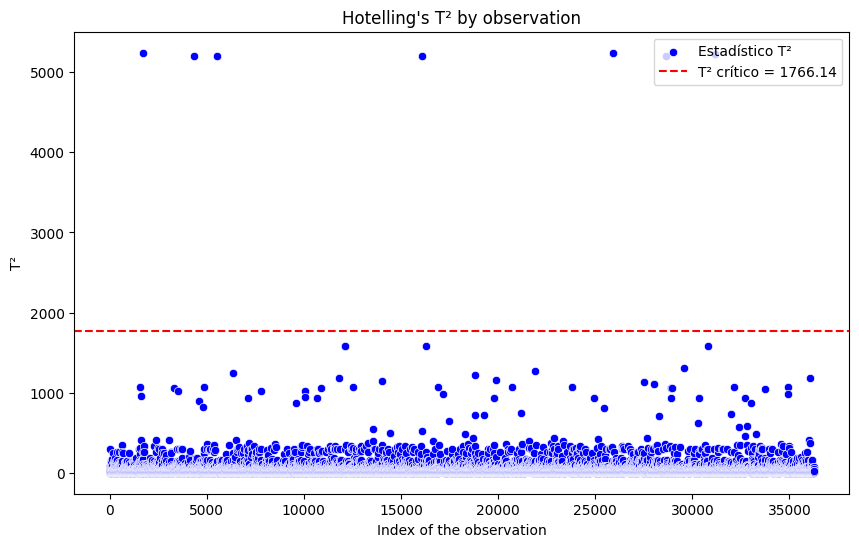

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(len(T2)), y=T2, color='blue', label='Estadístico T²')

plt.axhline(y=T2_crit, color='red', linestyle='--', label=f'T² crítico = {T2_crit:.2f}')

plt.title("Hotelling's T² by observation")
plt.xlabel("Index of the observation")
plt.ylabel("T²")
plt.legend(loc='upper right')

sns.set_style("darkgrid")

plt.show()

In [67]:
DATA_OUTLIERS = df_copy.iloc[np.where(outliers)[0]]
DATA_OUTLIERS

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
1694,1,0,0,1,0,0,0,2017,12,31,...,1,0,0,0,0,1,0,0,0,0
4362,2,0,1,1,1,0,116,2018,6,11,...,0,0,0,1,0,1,0,0,0,0
5511,2,0,1,2,1,0,180,2018,10,10,...,0,0,0,1,0,1,0,0,0,0
16090,1,0,1,2,1,0,66,2017,10,9,...,0,0,1,0,0,1,0,0,0,0
25906,1,0,0,1,0,0,0,2017,12,31,...,1,0,0,0,0,1,0,0,0,0
28644,2,0,0,2,1,0,114,2018,10,13,...,0,0,1,0,0,1,0,0,0,0
31170,2,0,1,5,1,0,11,2018,11,1,...,0,1,0,0,0,1,0,0,0,0


Based on the T2 test and with a significance of 1e-8, 7 outliers were identified

In [68]:
df_copy.shape

(36275, 26)

In [69]:
outlier_indices = np.where(outliers)[0]

df_copy_filtered = df_copy[~df_copy.index.isin(outlier_indices)]
df_copy_filtered

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,2,0,1,2,1,0,224,2017,10,2,...,0,0,1,0,0,0,0,0,0,0
1,2,0,2,3,0,0,5,2018,11,6,...,0,0,0,1,0,0,0,0,0,0
2,1,0,2,1,1,0,1,2018,2,28,...,0,0,0,1,0,0,0,0,0,0
3,2,0,0,2,1,0,211,2018,5,20,...,0,0,0,1,0,0,0,0,0,0
4,2,0,1,1,0,0,48,2018,4,11,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,85,2018,8,3,...,0,0,0,1,0,0,1,0,0,0
36271,2,0,1,3,1,0,228,2018,10,17,...,0,0,0,1,0,0,0,0,0,0
36272,2,0,2,6,1,0,148,2018,7,1,...,0,0,0,1,0,0,0,0,0,0
36273,2,0,0,3,0,0,63,2018,4,21,...,0,0,0,1,0,0,0,0,0,0


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [70]:
# we will define a function to check VIF

def checking_vif(predictors):

    vif = pd.DataFrame()

    vif["feature"] = predictors.columns

    # calculating VIF for each feature

    vif["VIF"] = [

        variance_inflation_factor(predictors.values, i)

        for i in range(len(predictors.columns))

    ]

    return vif

In [71]:
checking_vif(df_copy_filtered.drop('booking_status', axis=1)).sort_values(by=['VIF'], ascending=False)

,feature,VIF
7,arrival_year,321.741382
18,market_segment_type_Online,192.199180
17,market_segment_type_Offline,87.799860
13,avg_price_per_room,18.403521
0,no_of_adults,18.239969
16,market_segment_type_Corporate,17.484507
8,arrival_month,7.202155
4,type_of_meal_plan,6.503589
15,market_segment_type_Complementary,4.426964
9,arrival_date,4.209533


In [72]:
#feature engineering to reduce VIF>5
df_features=df_copy_filtered.copy()
df_features["R_y_m"]=(df_features["arrival_year"]/df_features["arrival_month"])-(df_features["market_segment_type_Online"]+df_features["market_segment_type_Offline"]+df_features["market_segment_type_Corporate"])

df_features["R_av_ad"]=(df_features["avg_price_per_room"]-100*(df_features["no_of_adults"]))

df_features.drop(["arrival_year","arrival_month","market_segment_type_Online","market_segment_type_Offline","market_segment_type_Corporate","avg_price_per_room","no_of_adults"],axis=1,inplace=True)

checking_vif(df_features.drop('booking_status', axis=1)).sort_values(by=['VIF'], ascending=False)

,feature,VIF
3,type_of_meal_plan,4.075882
6,arrival_date,3.474006
19,R_av_ad,3.436048
2,no_of_week_nights,3.360218
5,lead_time,2.379162
18,R_y_m,2.165945
0,no_of_children,2.099389
1,no_of_weekend_nights,1.940297
16,room_type_reserved_Room_Type 6,1.878018
10,no_of_special_requests,1.683449


<Axes: >

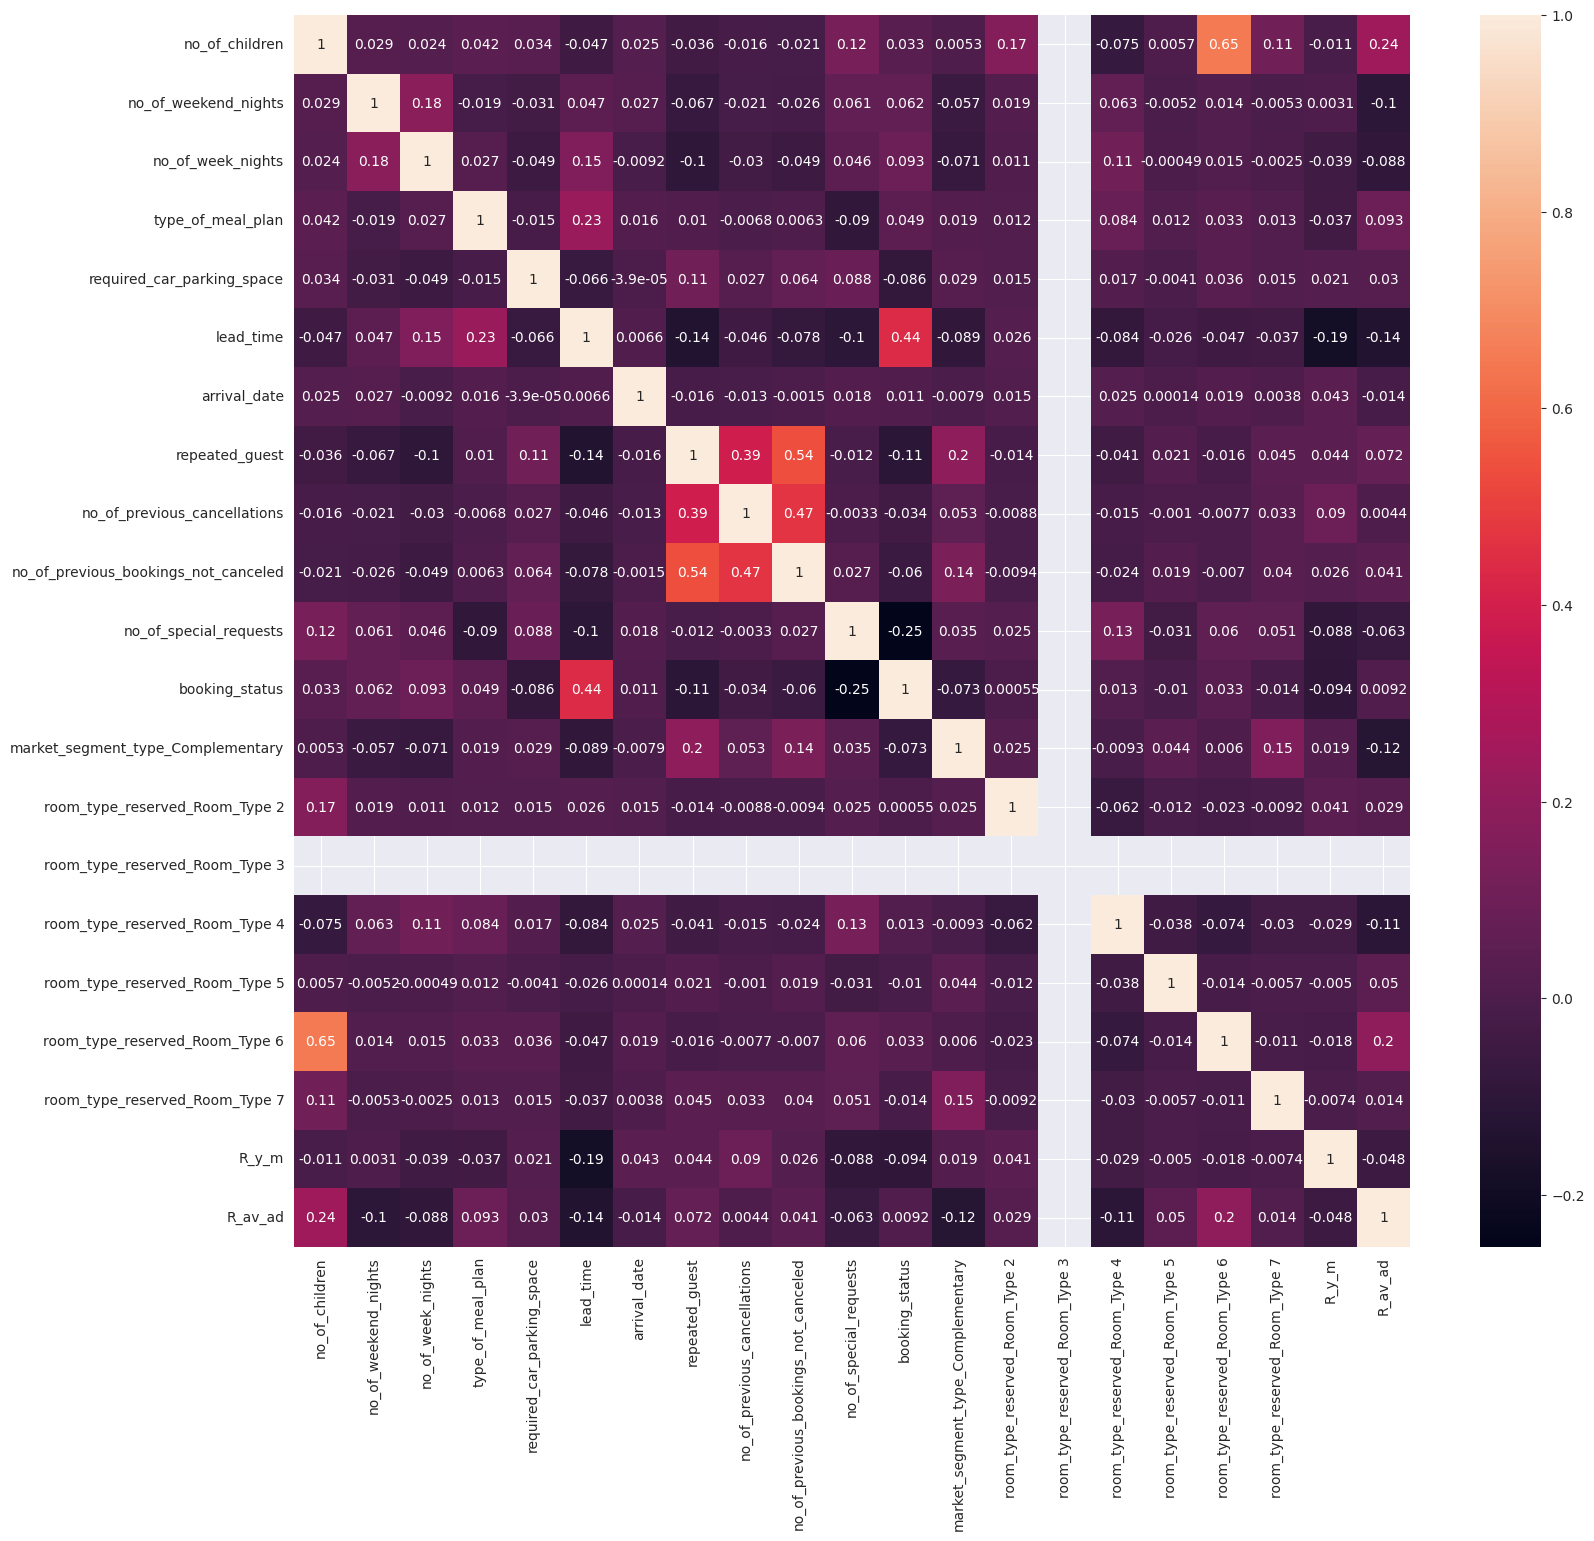

In [73]:
fig=plt.figure(figsize=(18,16))
sns.heatmap(df_features.corr(), annot=True)

Visualizing the heatmap of the correlation matrix with the booking_status, a correlation of -0.25 is observed for the number of no_of_special_requests and a correlation of 0.44 for lead_time

## Building a Logistic Regression model

In [74]:
df_features.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,booking_status,market_segment_type_Complementary,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,R_y_m,R_av_ad
0,0,1,2,1,0,224,2,0,0,0,...,0,0,0,0,0,0,0,0,200.700000,-135.00
1,0,2,3,0,0,5,6,0,0,0,...,0,0,0,0,0,0,0,0,182.454545,-93.32
2,0,2,1,1,0,1,28,0,0,0,...,1,0,0,0,0,0,0,0,1008.000000,-40.00
3,0,0,2,1,0,211,20,0,0,0,...,1,0,0,0,0,0,0,0,402.600000,-100.00
4,0,1,1,0,0,48,11,0,0,0,...,1,0,0,0,0,0,0,0,503.500000,-105.50


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns=['booking_status']), df_features['booking_status'], test_size=0.2, random_state=42)

In [76]:
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)

# Assuming you have your true labels (y_test) and predicted labels (y_pred)

f1 = f1_score(y_test, y_pred)
print("F1 Score: ",round(f1,2))

F1 Score:  0.57


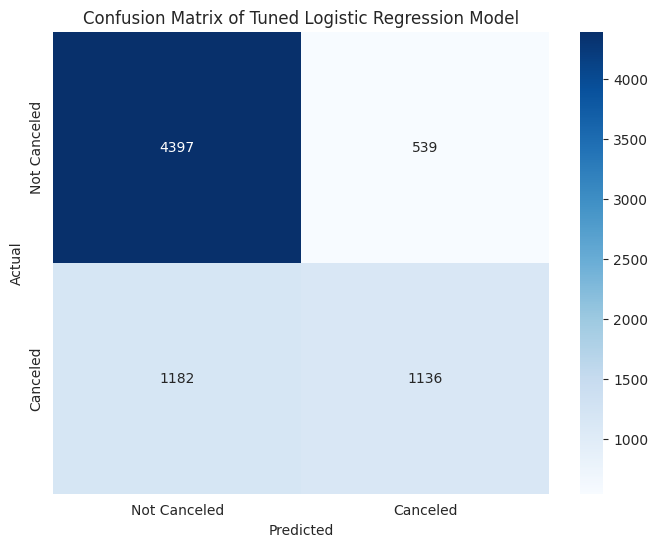

In [77]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from the best_model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Tuned Logistic Regression Model')
plt.show()

## Model performance evaluation

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a scorer object using make_scorer
f1_scorer = make_scorer(f1_score)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(),  # The model to tune
    param_grid=param_grid,          # The hyperparameter grid
    scoring=f1_scorer,              # The scoring metric (F1 score)
    cv=5,                           # The number of cross-validation folds
    n_jobs=1                       # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (Test Set): {f1:.2f}")

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
F1 Score (Test Set): 0.58


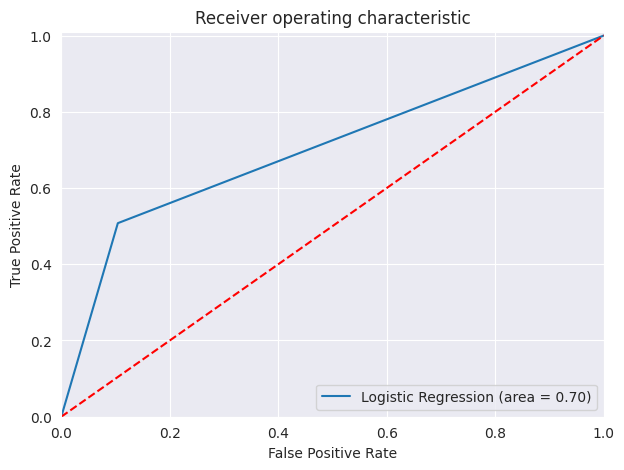

In [108]:
logit_roc_auc_train = roc_auc_score(y_train, best_model.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_train, best_model.predict(X_train))

plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)

plt.plot([0, 1], [0, 1], "r--")

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.01])

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("Receiver operating characteristic")

plt.legend(loc="lower right")

plt.show()

## Final Model Summary

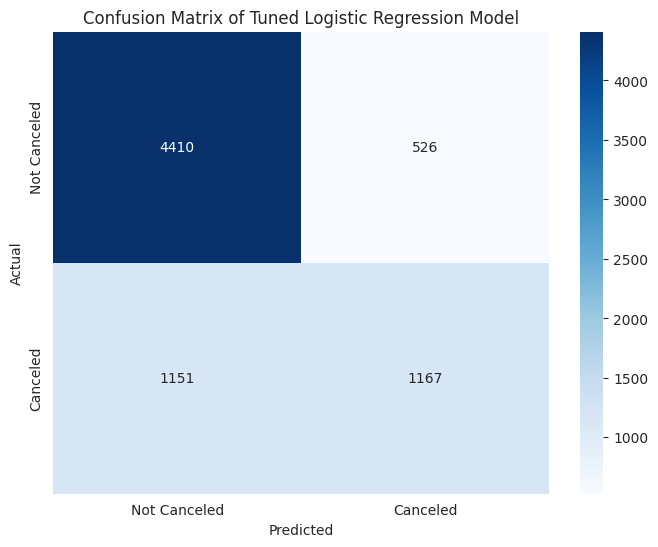

In [80]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from the best_model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Tuned Logistic Regression Model')
plt.show()

It can be observed that hyperparameter tuning improved the F1 Score from 0.57 to 0.58. This is also reflected in the confusion matrix. However, it is suggested to work with another model to achieve better performance.

## Building a Decision Tree model

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns=['booking_status']), df_features['booking_status'], test_size=0.2, random_state=42)
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred=dtree.predict(X_test)

score_train=f1_score(y_train,dtree.predict(X_train))
score_test=f1_score(y_test,y_pred)


print("F1 Score Train: ", score_train)
print("F1 Score Test: ", score_test)


F1 Score Train:  0.9903820886109214
F1 Score Test:  0.7739991390443393


## Do we need to prune the tree?

Yes, because F1_train_score is much higher(very close to 1.0)  than F1_test_score (0.77) is overfitted , so we do need to prune the tree

if we look at the number of negatives Versus positives.....23% of the ppl had
canceled and 77% did not canceled....

In [109]:
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier from sklearn.tree

estimator=DecisionTreeClassifier(random_state=42)
parameters={'max_depth':[None],
            'min_samples_split':[2],
            'min_samples_leaf':[1,2,3],
            'max_leaf_nodes':[150]
            }

#'min_impurity_decrease':[0.001, 0.01, 0.1]

f1_scorer = make_scorer(f1_score)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=estimator,  # The model to tune
    param_grid=parameters,          # The hyperparameter grid
    scoring=f1_scorer,              # The scoring metric (F1 score)
    cv=5,                           # The number of cross-validation folds
    n_jobs=1                       # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score (Test Set): {f1:.2f}")


Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': 150, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 Score (Test Set): 0.76


In [110]:
score_train=f1_score(y_train,best_model.predict(X_train))

print("F1 Score Train 2: ", score_train)

F1 Score Train 2:  0.7753730493222463


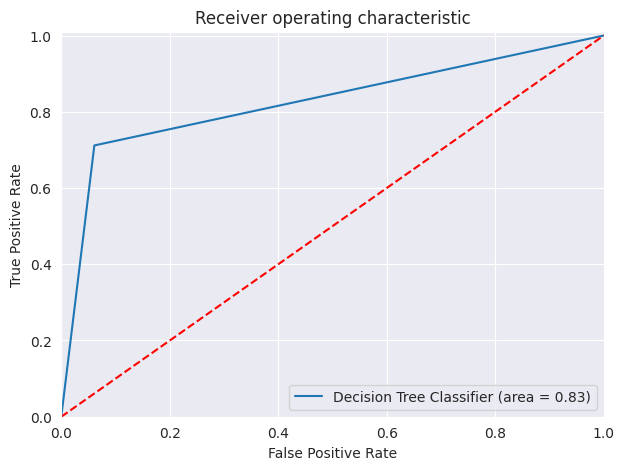

In [111]:
tree_roc_auc_train = roc_auc_score(y_train, best_model.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_train, best_model.predict(X_train))

plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label="Decision Tree Classifier (area = %0.2f)" % tree_roc_auc_train)

plt.plot([0, 1], [0, 1], "r--")

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.01])

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("Receiver operating characteristic")

plt.legend(loc="lower right")

plt.show()

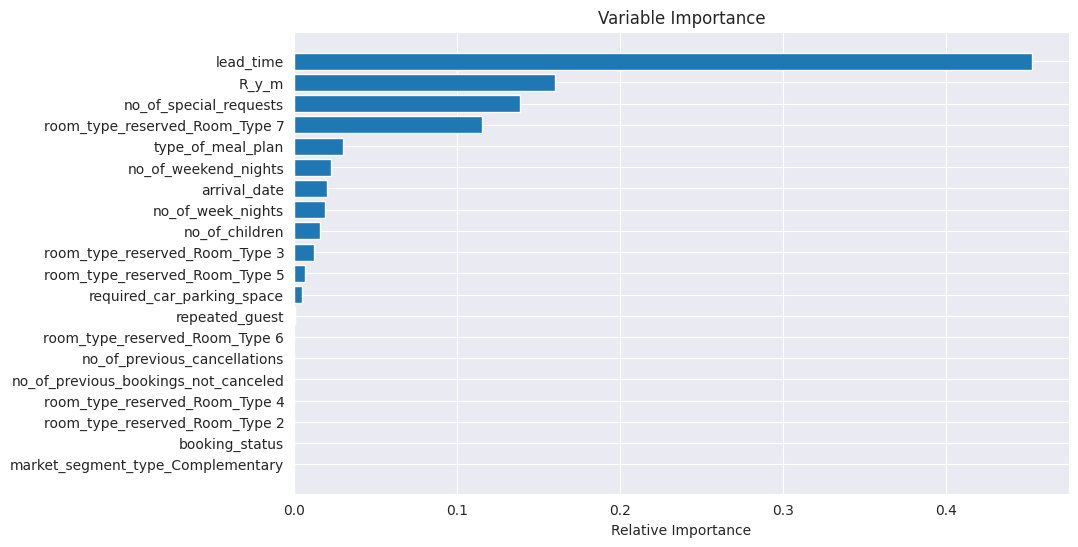

In [112]:
importances=best_model.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [df_features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Model Performance Comparison and Conclusions

After training the models and performing the respective tuning, it can be observed through the metrics that the decision tree achieved better performance with an F1 score of 0.76 and an AUC of 0.83 on the test set. Meanwhile, logistic regression resulted in an F1 score of 0.58 and an AUC of 0.70.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

1) It is recommended that the hotel implement stricter policies regarding lead time, such as allowing free cancellation only up to a certain number of days before the stay (specifically when the lead time is greater than 60 days)

2) Guests should be allowed to cancel their reservation free of charge up to at least one week before the check-in date. However, if the cancellation occurs within 48 hours of the check-in date, the full charge will be applied to their card. This is because customers in the aviation segment typically book around 5 days in advance and have a high cancellation rate

3) For bookings made in well advance, require a partial deposit or a credit card pre-authorization to reduce impulsive cancellations (as can happen in for online customers)





